In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [2]:
url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
data = pd.read_csv(url, compression='zip')

# Extração de informações

**1. Sobre o dataframe:**
1. Cada linha presente no dataframe é uma cultura de células.
2. células tem tempo de vida, se dividem até 40~60 vezes, depois começam a morrer. O câncer consegue se replicar indefinidamente.
3. as células presentes neste dataframe foram coletadas por uma linhagem de uma mulher, coletadas em 1950 e vivem até hoje. A vacina da poliomielite foi feita à partir delas.

**1.1. Tipos de tratamento:**

- com droga: células sob efeito de manipulações.

- com controle: células em condições normais.

**1.2. Tempo:** após cultivar as células, será aplicada a droga e analisada após de 24, 48, 72 horas, permitindo analisar até qual tempo surge o efeito de reação da droga.

**1.3. Dose:** tipos de dose aplicadas nas culturas. Sem afirmação sobre a concentração de cada tipo.

**1.3. c-x:** o conjunto de células é submetido a um composto, a variável 'c' informa quantas células sobreviveram ao tratamento.

**1.4. g-x:** expressões - fator multiplicador referente a quantos RNAs serão produzidos pelo gene - de cada gene relacionada a droga ou a dose. Há drogas que aumentam a expressão do gene e drogas que diminuem a expressão. As células controle são nossas referências.
**Todos os dados estão normalizados**.


A membrana citoplasmática separa o interior da célula do exterior. Dentro da célula temos o núcleo. Dentro do núcleo temos o DNA, com toda as informações genéticas do ser humano

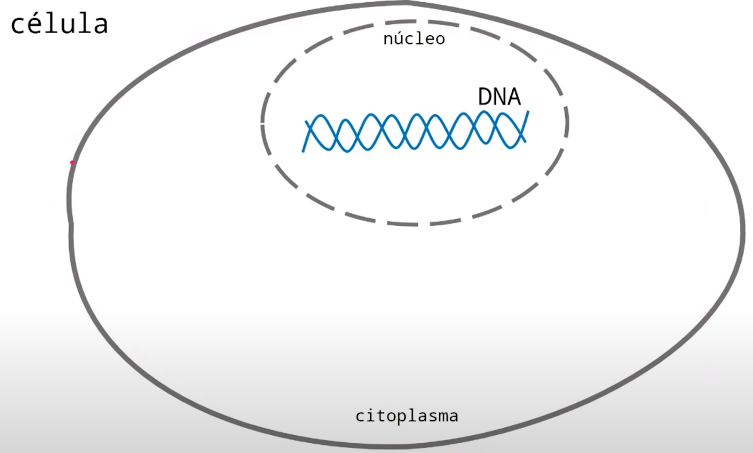

Dentro do DNA temos os genes, que são porçõs do DNA com a receita para sintetizar a proteína. A proteína é sintetizada fora do núcleo, que é carregada pelo RNA mensageiro. Em condições normais, a célula produz 4 RNAs (expresão gênica = 1x). 

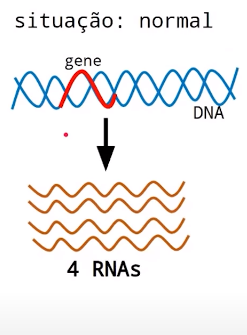

Sob algum estímulo, como drogas, luz, ph, a expressão genética pode aumentar ou diminuir.

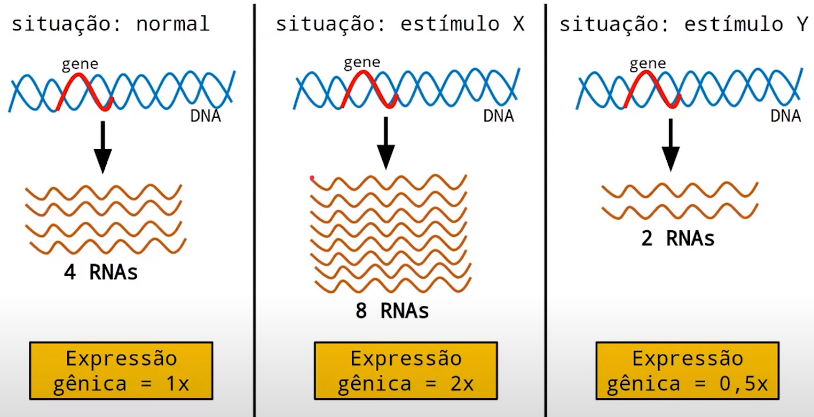

In [3]:
print('shape:', data.shape)
data.head()

shape: (23814, 877)


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Modificando o nome das colunas

In [4]:
data.rename({'droga': 'composto'}, axis=1, inplace=True)

In [5]:
data.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


<center> informações dos pacientes controle e com droga

In [6]:
data.groupby('tratamento').count()

,id,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
tratamento,,,,,,,,,,,,,,,,,,,,,
com_controle,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,...,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866
com_droga,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,...,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948


<center> informações de tempo

In [7]:
data.groupby('tempo').count()

,id,tratamento,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
tempo,,,,,,,,,,,,,,,,,,,,,
24,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772,...,7772,7772,7772,7772,7772,7772,7772,7772,7772,7772
48,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250,...,8250,8250,8250,8250,8250,8250,8250,8250,8250,8250
72,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,...,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792


In [8]:
data.composto.nunique()

3289

<AxesSubplot:>

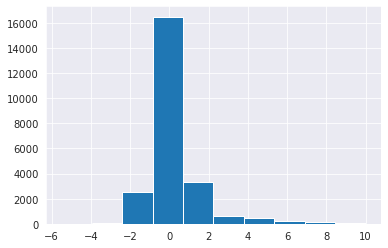

In [9]:
data['g-0'].hist()

Por quê a classe tratamento é tão desbalanceada? as doses e o tempo também estão desbalanceados?

<center>Proporção de classes:

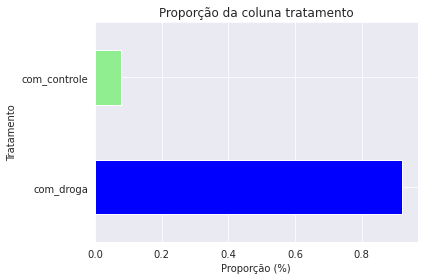

In [10]:
data.tratamento.value_counts(normalize=True).plot.barh(
    color=['blue', 'lightgreen'], title='Proporção da coluna tratamento')
plt.xlabel('Proporção (%)')
plt.ylabel('Tratamento')
plt.tight_layout()

<center>Proporção de doses:

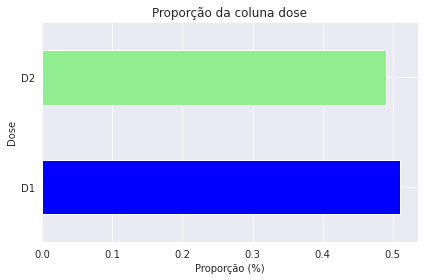

In [11]:
data.dose.value_counts(normalize=True).plot.barh(
    color=['blue', 'lightgreen'], title='Proporção da coluna dose')
plt.xlabel('Proporção (%)')
plt.ylabel('Dose')
plt.tight_layout()

<center>Proporção do tempo:

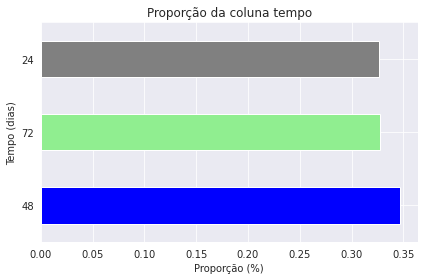

In [12]:
data.tempo.value_counts(normalize=True).plot.barh(
    color=['blue', 'lightgreen', 'gray'], title='Proporção da coluna tempo')
plt.xlabel('Proporção (%)')
plt.ylabel('Tempo (dias)')
plt.tight_layout()

<center>Quantos tipos de drogas foram investigados?

In [13]:
data.composto.nunique()

3289

<center>Quais compostos tem a maior frequẽncia?

In [14]:
drugs_frequency = data.composto.value_counts().index[:5]
drugs_frequency

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [15]:
data.query('composto in @drugs_frequency')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


In [16]:
data.query('composto in @drugs_frequency').groupby('composto').count()

,id,tratamento,tempo,dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
composto,,,,,,,,,,,,,,,,,,,,,
5628cb3ee,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
87d714366,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
8b87a7a83,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
9f80f3f77,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246
cacb2b860,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,...,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866


Text(0.5, 1.0, '5 compostos mais frequêntes')

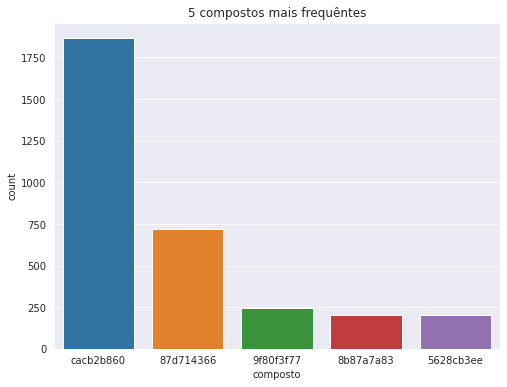

In [17]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='composto',
                   data=data.query('composto in @drugs_frequency'),
                   order=drugs_frequency)

ax.set_title('5 compostos mais frequêntes')

<center>Análise por histograma

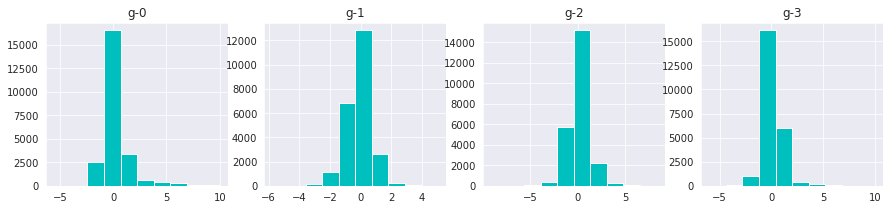

In [18]:
plt.figure(figsize=(15, 3))
for count in range(4):
    ax = plt.subplot(1, 4, count + 1)
    ax.hist(data[f'g-{count}'], color='c')
    ax.set_title(data[f'g-{count}'].name)

<center> análise por histograma das expressões genéticas

In [19]:
data.loc[:, 'g-1':'g-771'].describe().T.head()

,count,mean,std,min,25%,50%,75%,max
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
g-5,23814.0,-0.138836,1.179388,-10.000,-0.602225,-0.01565,0.510425,7.282


Text(0.5, 1.0, 'Média das linhagens celulares - c')

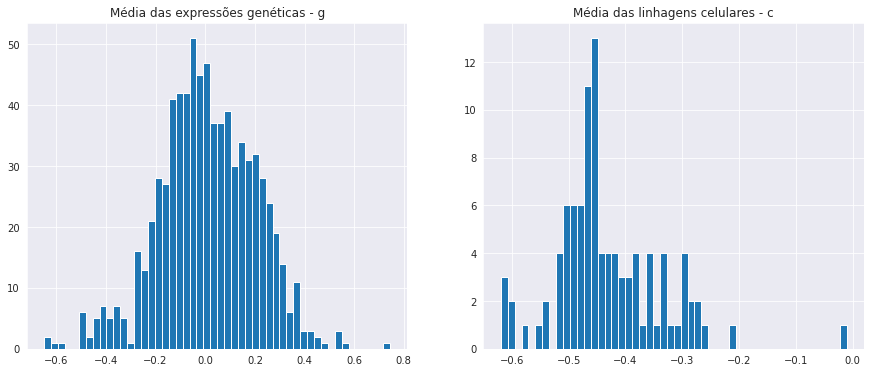

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(data.loc[:, 'g-1':'g-771'].describe().T['mean'], bins=50)
ax[0].set_title('Média das expressões genéticas - g')

ax[1].hist(data.loc[:, 'c-0':'c-99'].describe().T['mean'], bins=50)
ax[1].set_title('Média das linhagens celulares - c')

<center> boxplot das expressões genéticas em relação ao tratamento

Text(0.5, 1.0, 'Expressões genéticas em relação ao tratamento')

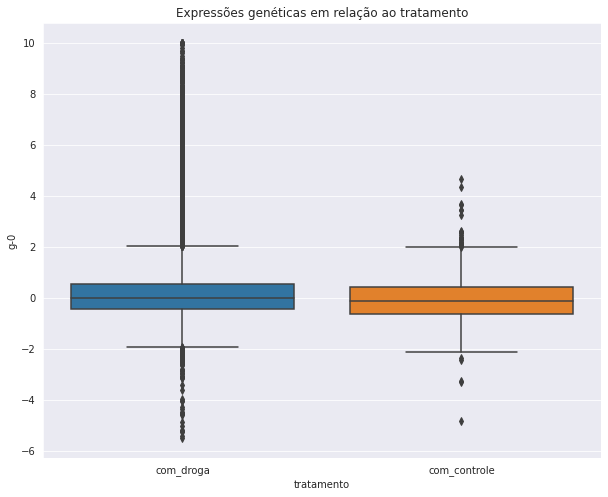

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='tratamento', y='g-0', data=data)
plt.title('Expressões genéticas em relação ao tratamento')

Podemos analisar que os pacientes com drogas tem muitos outliers

# Análises Estatísticas

## Crosstab

In [22]:
# index = data.dose
# columns = data.tempo, data.tratamento
pd.crosstab([data.dose, data.tempo], data.tratamento, normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Pode-se analisar a frequência por index. Os dois tipos de dose foram aplicados 92% dos pacientes com droga e em 7% dos pacientes controle.

In [23]:
# utilizando crosstab para analisar apenas um composto [g-0]
pd.crosstab([data.dose, data.tempo],
            data.tratamento,
            values=data['g-0'],
            aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

## Groupby

In [24]:
data.groupby(['dose', 'tempo', 'tratamento']).mean()

g-0       g-1       g-2       g-3       g-4  \
dose tempo tratamento                                                       
D1   24    com_controle -0.251760 -0.453322  0.246235  0.010318 -0.444798   
           com_droga     0.367996 -0.170839  0.391348  0.096097  0.173467   
     48    com_controle -0.122773 -0.453638  0.067312  0.031977 -0.273520   
           com_droga     0.412469 -0.142581  0.258459  0.045746  0.170702   
     72    com_controle -0.295271 -0.669059 -0.051885  0.173242 -0.357938   
           com_droga     0.286250 -0.127878  0.146559  0.046066  0.096082   
D2   24    com_controle  0.010754 -0.229451  0.236691  0.138449 -0.460728   
           com_droga     0.115253 -0.081764  0.374927  0.171123 -0.073926   
     48    com_controle  0.013174  0.001737 -0.254331  0.061898 -0.213992   
           com_droga     0.214480 -0.001143  0.025528  0.084358  0.036800   
     72    com_controle  0.070250  0.133537 -0.478629  0.131484  0.144360   
           com_droga     0.253439  0.052840 -0.197125  0.048616  0.096403   

                              g-5       g-6       g-7       g-8       g-9  \
dose tempo tratamento                                                       
D1   24    com_controle  0.088504  0.296561 -0.070905  0.378453  0.477035   
           com_droga     0.144212  0.057603 -0.290533 -0.200714  0.191454   
     48    com_controle  0.268677  0.528050  0.002930  0.256508  0.333994   
           com_droga     0.055708  0.046441 -0.226701 -0.320235  0.156027   
     72    com_controle  0.267095  0.873864 -0.332740  0.119413  0.224316   
           com_droga    -0.176217 -0.000325 -0.223963 -0.274481  0.053455   
D2   24    com_controle -0.249274  0.225583 -0.220168  0.544010  0.321014   
           com_droga    -0.193544  0.044622 -0.161209 -0.122004  0.073228   
     48    com_controle -0.473742  0.122005 -0.249623  0.591717  0.217804   
           com_droga    -0.327807 -0.024254 -0.138845 -0.260450  0.067696   
     72    com_controle -0.457559 -0.178501 -0.247522  0.501499  0.246906   
           com_droga    -0.386250 -0.055357 -0.182029 -0.251460  0.077881   

                         ...      c-90      c-91      c-92      c-93  \
dose tempo tratamento    ...                                           
D1   24    com_controle  ...  0.300636  0.291550  0.128567  0.444431   
           com_droga     ... -0.421914 -0.412703 -0.407672 -0.536029   
     48    com_controle  ...  0.289473  0.276513  0.151361  0.414117   
           com_droga     ... -0.541197 -0.560826 -0.631755 -0.638444   
     72    com_controle  ...  0.220010  0.113796  0.053005  0.330137   
           com_droga     ... -0.774766 -0.754706 -0.928324 -0.753096   
D2   24    com_controle  ...  0.059889 -0.052784 -0.144478  0.134818   
           com_droga     ... -0.342179 -0.317650 -0.282119 -0.420074   
     48    com_controle  ...  0.111135  0.126310 -0.048936  0.153366   
           com_droga     ... -0.468576 -0.468295 -0.467402 -0.480126   
     72    com_controle  ... -0.022892  0.023245 -0.077916  0.150076   
           com_droga     ... -0.585648 -0.550273 -0.620299 -0.558437   

                             c-94      c-95      c-96      c-97      c-98  \
dose tempo tratamento                                                       
D1   24    com_controle  0.417357  0.304941  0.320500  0.282536  0.350566   
           com_droga    -0.434769 -0.171783 -0.385074 -0.296366 -0.340809   
     48    com_controle  0.497414  0.297966  0.264618  0.275933  0.408657   
           com_droga    -0.637824 -0.459417 -0.552413 -0.488532 -0.634006   
     72    com_controle  0.383052  0.160091  0.081301  0.133523  0.379652   
           com_droga    -0.887254 -0.713483 -0.801669 -0.634697 -0.835132   
D2   24    com_controle  0.102808  0.177209  0.067073  0.032768  0.134107   
           com_droga    -0.328230 -0.112576 -0.294761 -0.226265 -0.254499   
     48    com_controle  0.177688  0.159130  0.141280  0.179814  0.232461   
           com_d

## Data View - Procurando por padrões entre os dados

Comparando dois tipos de expressões genéticas

In [25]:
data[['g-0', 'g-3']].head()

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919


<AxesSubplot:xlabel='g-0', ylabel='g-15'>

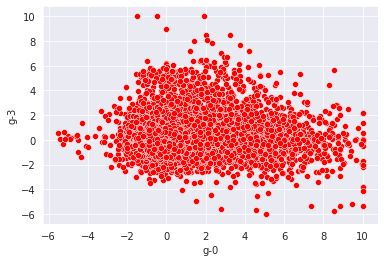

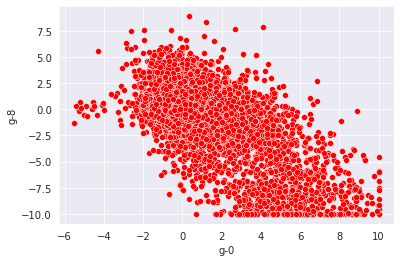

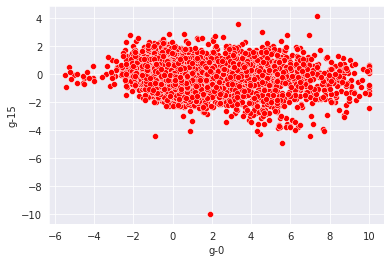

In [26]:
plt.figure(0)
sns.scatterplot(x='g-0', y='g-3', data=data, color=['red'])
plt.figure(1)
sns.scatterplot(x='g-0', y='g-8', data=data, color=['red'])
plt.figure(2)
sns.scatterplot(x='g-0', y='g-15', data=data, color=['red'])

Há uma tendência de quanto maior for o g-0, menor o g-8.

<Figure size 432x288 with 0 Axes>

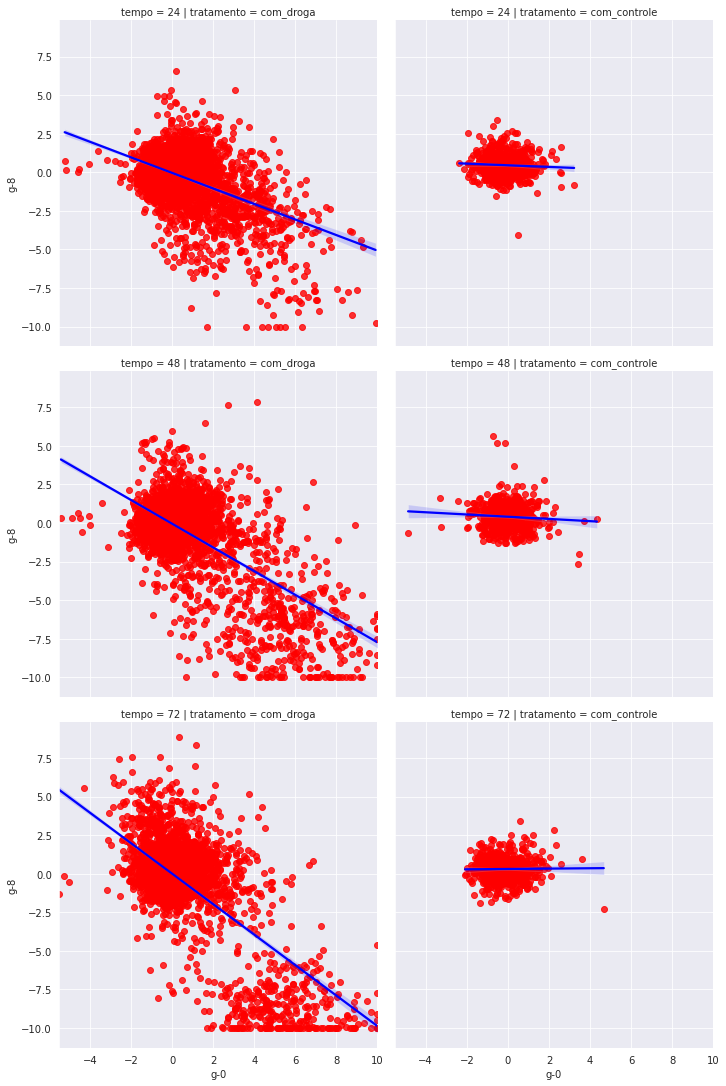

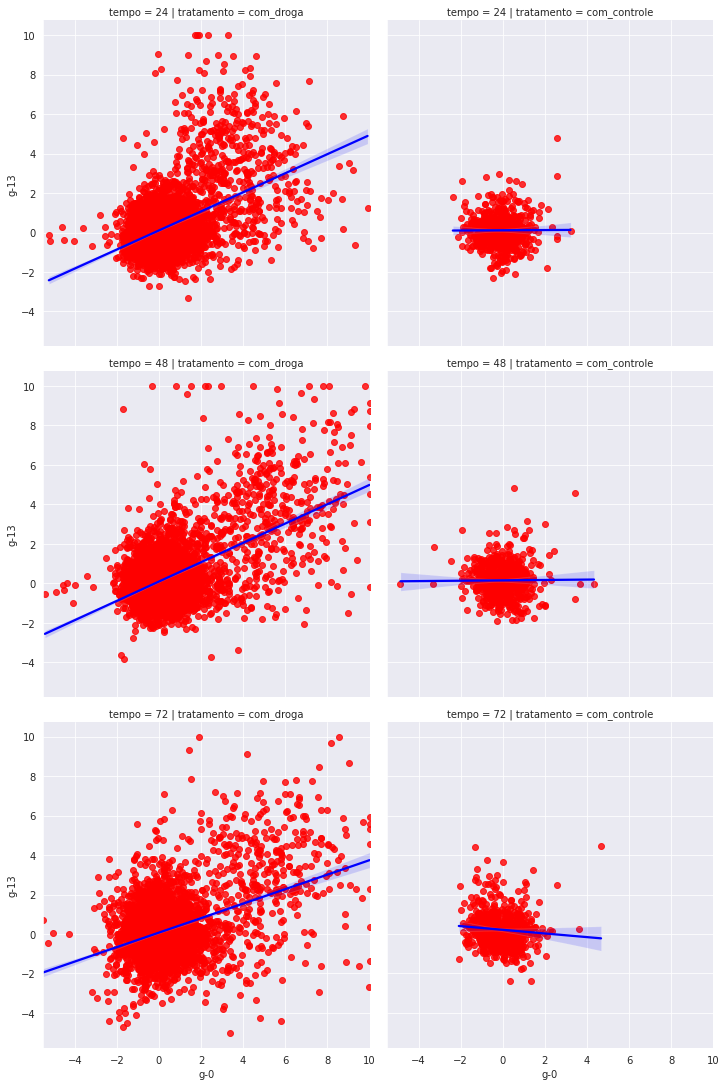

In [27]:
# col = separa o gráfico em relação ao tratamento

plt.figure(0)
sns.lmplot(data=data,
           x='g-0',
           y='g-8',
           col='tratamento',
           row='tempo',
           scatter_kws={'color': 'red'},
           line_kws={'color': 'blue'})

plt.figure(1)
sns.lmplot(data=data,
           x='g-0',
           y='g-13',
           col='tratamento',
           row='tempo',
           scatter_kws={'color': 'red'},
           line_kws={'color': 'blue'})

Percebe-se que quanto maior o tempo, a linha vai se inclinando cada vez mais, permitindo analisar o efeito da droga. Para os pacientes controle, pode-se analisar que mantém um padrão, o que é esperado para este propósito.

## Correlação


Já percebemos que o comportamento das expressões genéticas varia pelo tipo de droga e pelo tempo de exposição. O próximo passo é analisar a correlação entre as expressões genéticas.

In [28]:
data.loc[:, 'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g-767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g-768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g-769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g-770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


In [29]:
# analisando a correlação entre os dados que já foram visualisados
data.loc[:, ['g-0', 'g-8']].corr()

,g-0,g-8
g-0,1.000000,-0.604212
g-8,-0.604212,1.000000


Confirmando os resultados, pode-se perceber que g-0 e g-8 são inversamente proporcionais. Por esse motivo, quanto maior o valor de g-0, menor o valor de g-8. Quanto maior o tempo de exposição, mais amostras concentravam no canto inferior direito do scatter plot.

**correlação por expressões:**

<AxesSubplot:>

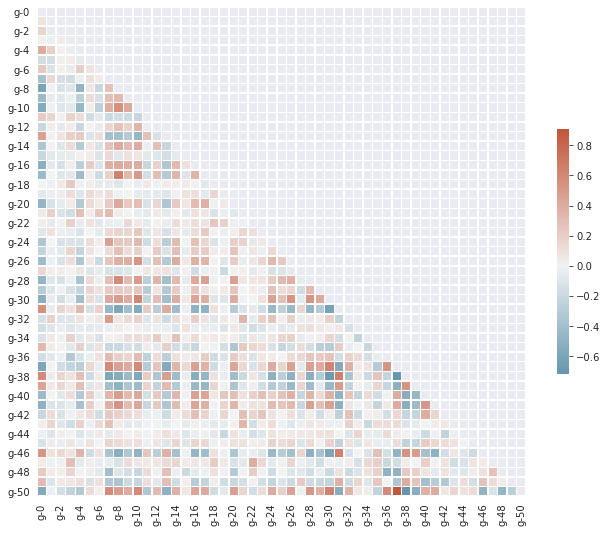

In [30]:
# Compute the correlation matrix
corr_expressoes = data.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_expressoes, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_expressoes,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

g-50 e g-36 a g-38 apresentam uma correlação maior, vamos analisar:

<Figure size 432x288 with 0 Axes>

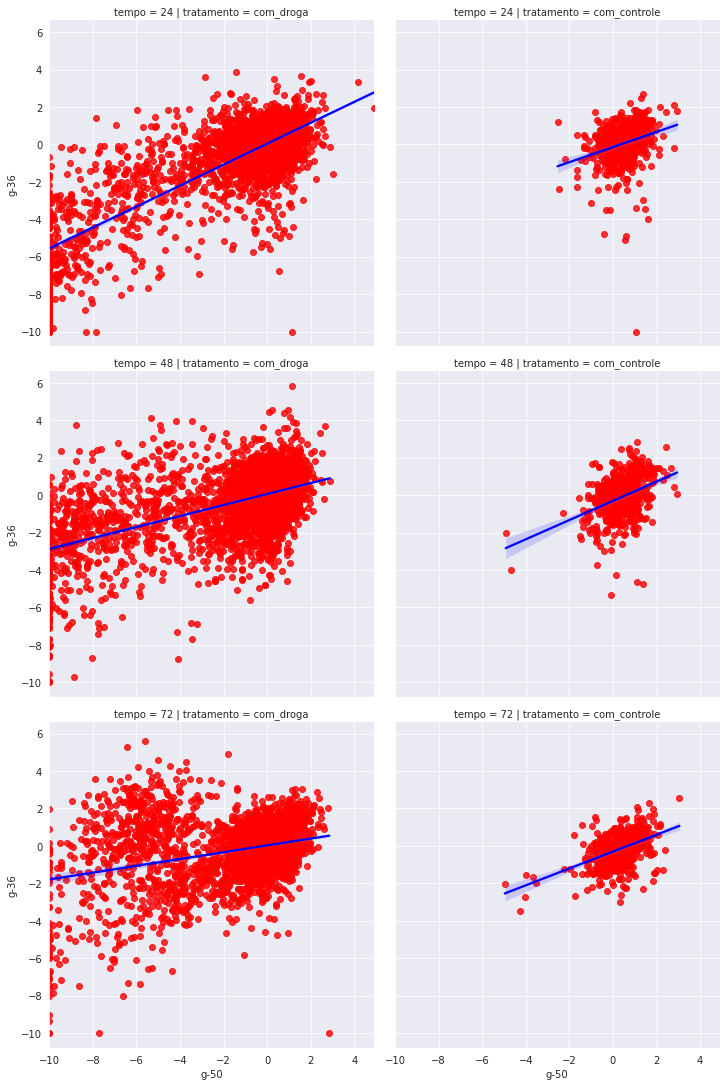

In [31]:
plt.figure(0)
sns.lmplot(data=data,
           x='g-50',
           y='g-36',
           col='tratamento',
           row='tempo',
           scatter_kws={'color': 'red'},
           line_kws={'color': 'blue'})

Por mais correlacionadas que as variáveis estão, podemos afirmar que correlação não é causalidade. Posso ter uma alta correlação, porém não tem relação nenhuma sobre o comportamento da minha variável. Logo, uma expressão pode não alterar o aumento ou diminuição da outra.

**correlação por células sobreviventes:**

<AxesSubplot:>

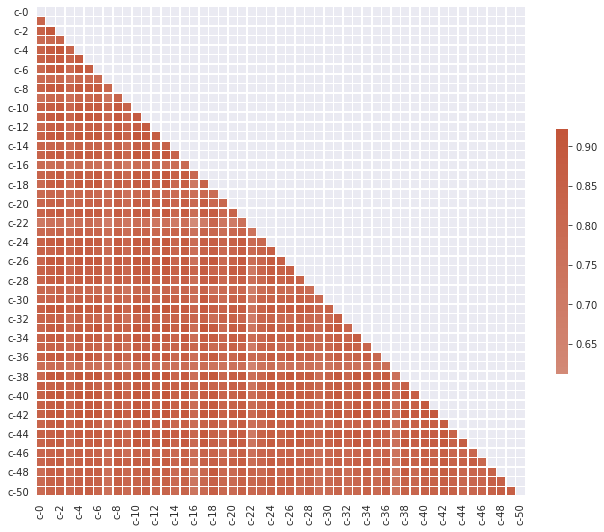

In [32]:
# Compute the correlation matrix
corr_celulas = data.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celulas, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celulas,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

Os tipos celulares estão bem correlacionados com o conjunto de dados.

# Extração de dados referentes aos resultados

**Sobre o dataframe:**

Apresenta dados contendo os mecanismos de ação da droga. Esses mecanismos referem-se à interação bioquímica do composto (droga) com o alvo (célula, proteína de uma célula...).

Os mecanismos de ação trazem dois tipos de informação:
- alvo;
- ação sobre o alvo.

**Termos importantes:**
- dados agonistas ativam o receptor;
- dados antagonistas bloqueiam o receptor;

**Labels:**
- o mecanismo de ativação foi ativado: 1;
- o mecanismo de ativação não foi ativado: 0

In [33]:
url_results = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'
data_results = pd.read_csv(url_results)
data_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <center> Analisando as variáveis categóricas

In [34]:
# selecionando apenas as colunas com variáveis do tipo int, faz a soma e ordena do maior para o menor
data_results.select_dtypes('int').sum().sort_values(ascending=False)

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

<center>top 10 das ações (inibidor, agonista...)

In [35]:
def get_top_features(df, n=10, feature=''):
    top = df.iloc[:, df.columns.str.contains(feature)]
    top_series = pd.DataFrame(top.sum().sort_values(ascending=False)[:n]).T
    ax = top_series.plot.bar(xlabel=f'types of {feature}')
    ax.legend(loc='center left', bbox_to_anchor=(1, .5))
    plt.title(f'feature:{feature}')
    plt.show()
    return

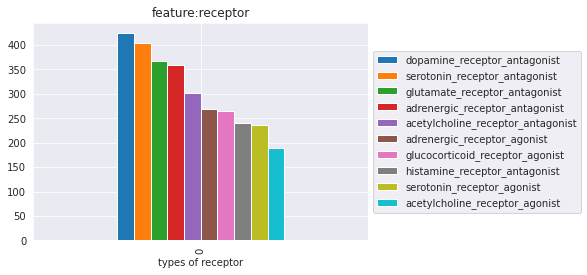

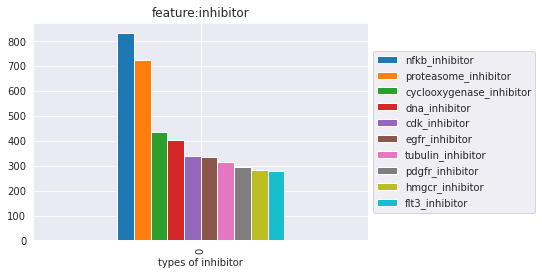

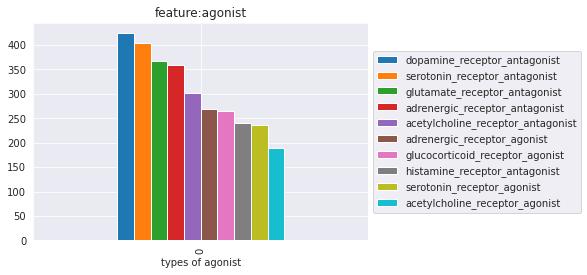

In [36]:
get_top_features(data_results, feature='receptor')
get_top_features(data_results, feature='inhibitor')
get_top_features(data_results, feature='agonist')

## Merge

<center> algum controle ativou os mecanismos de ação? O esperado é que nenhum controle ative esses mecanismos.

Para solucionar este problema, precisamos unir as base de dados, para obter a informação do tratamento do paciente que está em outro dataframe

In [37]:
# quantidade de mecanismos ativos (1) por experimento
data_results['n_moa'] = data_results.drop('id', axis=1).sum(axis=1)
data_results['moa_ativos'] = (data_results['n_moa'] != 0)
data_results.replace({True:1}, inplace=True)
data_results.replace({False:0}, inplace=True)

In [38]:
data_results.head(3)

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,moa_ativos
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1


levando apenas o número de moas ativos para a função merge

In [39]:
data_merged = pd.merge(data, data_results[['id', 'n_moa', 'moa_ativos']], on='id')
data_merged.head(3)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,moa_ativos
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1


## Análise entre compostos e genes

In [40]:
# verificando se, para os pacientes com controle, há algum mecanismo de ação.
data_merged.query('tratamento == "com_controle"').moa_ativos.value_counts()

0    1866
Name: moa_ativos, dtype: int64

In [41]:
# verificando se, para os pacientes com droga ativaram algum mecanismo de ação.
data_merged.query('tratamento == "com_droga"').moa_ativos.value_counts()

1    14447
0     7501
Name: moa_ativos, dtype: int64

<center>  selecionando os compostos mais utilizados e analisando nos genes

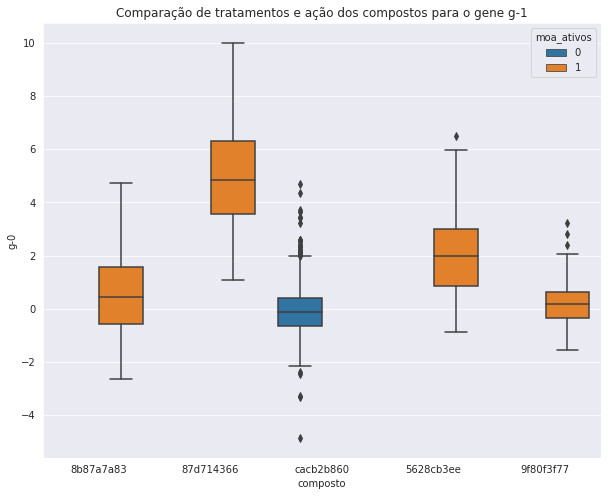

In [42]:
# selecionando os compostos mais utilizados
composto_principal = data_merged.composto.value_counts().index[:5]

plt.figure(figsize=(10, 8))
sns.boxplot(data=data_merged.query('composto in @composto_principal'),
            y='g-0',
            x='composto',
            
            # colore e cria uma legenda baseada na coluna 'moa_ativos'
            hue='moa_ativos');
plt.title('Comparação de tratamentos e ação dos compostos para o gene g-1');
#plt.xticks(rotation=0);

# Machine Learning

Insights:
1. Cada padrão de expressão gênica e da viabilidade celular apresentam valores que estabelecem se um mecanismo de ativação será ativado ou não. Um modelo de classificação binária permite passar uma assinatura celular qualquer como entrada e determinar se ela será ativada ou não.

In [43]:
data_merged.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,moa_ativos
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,1


In [44]:
data_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,moa_ativos
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Regressão Logistica 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from ipywidgets import interact

In [72]:
# selecioando apenas a expressão gênica e a assinatura celular, que estão em float
X = data_merged.select_dtypes('float')
y = data_merged.moa_ativos

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(19051, 872)
(19051,)
(4763, 872)
(4763,)


In [54]:
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X,y)

LogisticRegression(max_iter=500)

In [74]:
@interact(degree = (0,2,1), maxiter = (100,2000,1))
def train(degree, maxiter):
    global model_logistic
    poly = PolynomialFeatures(degree = degree)
    model_logistic = make_pipeline(poly, LogisticRegression(penalty = 'none', max_iter = maxiter))
    model_logistic.fit(X,y)    
    print(f"Train accuracy: {model_logistic.score(X_train,y_train)*100}%")
    print(f"  Val accuracy: {model_logistic.score(X_val,y_val)*100}%")

interactive(children=(IntSlider(value=1, description='degree', max=2), IntSlider(value=1050, description='maxi…